In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('survey_results.csv')
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [3]:
df.size

510170

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30010 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   30010 non-null  object
 1   age                             30010 non-null  int64 
 2   gender                          30010 non-null  object
 3   zone                            30010 non-null  object
 4   occupation                      30010 non-null  object
 5   income_levels                   21946 non-null  object
 6   consume_frequency(weekly)       30002 non-null  object
 7   current_brand                   30010 non-null  object
 8   preferable_consumption_size     30010 non-null  object
 9   awareness_of_other_brands       30010 non-null  object
 10  reasons_for_choosing_brands     30010 non-null  object
 11  flavor_preference               30010 non-null  object
 12  purchase_channel                30000 non-null

## **1 - Removing Duplicates**

In [5]:
df.duplicated(subset='respondent_id').sum()

np.int64(10)

In [6]:
df[df.duplicated()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
11317,R11312,18,F,Urban,Student,NaN,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150
19050,R19044,57,M,Semi-Urban,Retired,<10L,3-4 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),150-200
22412,R22405,26,M,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
23406,R23398,27,M,Urban,Working Professional,10L - 15L,5-7 times,Newcomer,Large (1 L),above 4,Availability,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
25068,R25059,34,F,Urban,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Eco-Friendly,High (Very health-conscious),"Active (eg. Sports, gym)",150-200


In [7]:
df[df.duplicated(subset='respondent_id', keep=False)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2308,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2665,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5150,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7793,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8515,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150


In [8]:
df = df.drop_duplicates(subset='respondent_id')
df.duplicated(subset='respondent_id').sum()

np.int64(0)

## **2 - Outlier Detection in Age Column** 

In [9]:
df.describe()

,age
count,30000.000000
mean,33.048167
std,13.438904
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


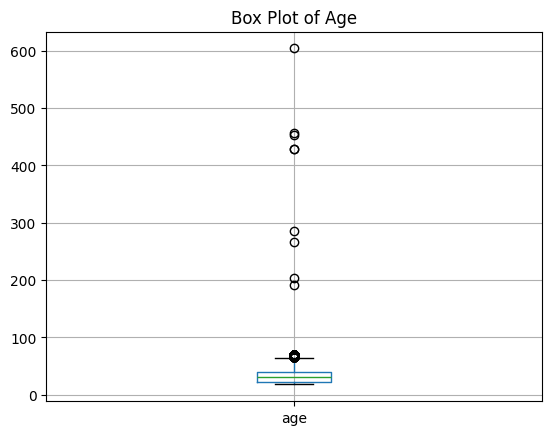

In [10]:
df.boxplot(column='age');
plt.title("Box Plot of Age")
plt.show();

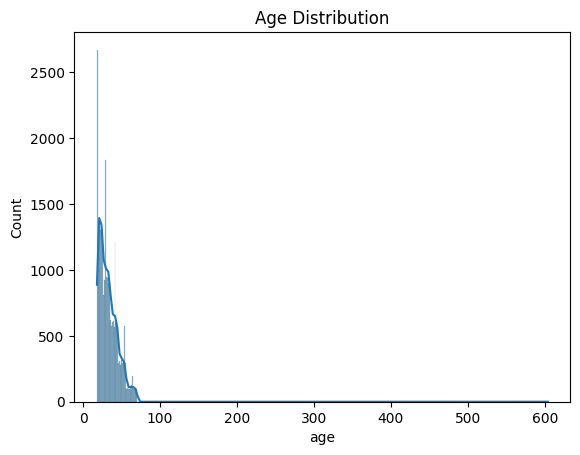

In [11]:
sns.histplot(data=df, x='age', kde=True)
plt.title("Age Distribution")
plt.show();

In [12]:
Q3 = df['age'].quantile(0.75)
Q1 = df['age'].quantile(0.25)

IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
(lower_bound, upper_bound)
# Filter the data
df_filtered = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [13]:
df_filtered.describe()

,age
count,29507.000000
mean,32.373132
std,11.117786
min,18.000000
25%,23.000000
50%,30.000000
75%,40.000000
max,65.000000


In [14]:
df[(df['age'] <= lower_bound) | (df['age'] >= upper_bound)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
71,R00072,70,F,Urban,Entrepreneur,<10L,3-4 times,Established,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Low (Not very concerned),Casual (eg. At home),150-200
117,R00118,68,F,Metro,Retired,10L - 15L,5-7 times,Established,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),150-200
215,R00216,67,M,Metro,Entrepreneur,10L - 15L,5-7 times,Established,Medium (500 ml),above 4,Availability,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
304,R00305,66,F,Rural,Retired,<10L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
392,R00393,69,F,Semi-Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),0 to 1,Availability,Exotic,Online,Simple,High (Very health-conscious),Casual (eg. At home),150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29872,R29863,66,M,Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
29942,R29933,70,M,Semi-Urban,Retired,16L - 25L,5-7 times,Established,Small (250 ml),0 to 1,Brand Reputation,Exotic,Online,Simple,Low (Not very concerned),Casual (eg. At home),100-150
29944,R29935,67,M,Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Social (eg. Parties),200-250
29985,R29976,70,F,Urban,Retired,<10L,3-4 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),150-200


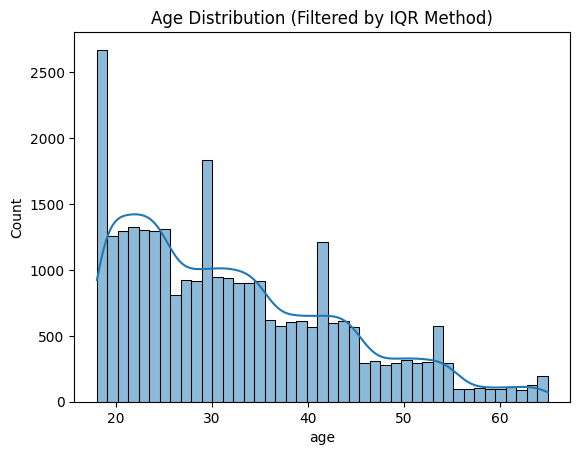

In [15]:
# Plot the histogram with KDE
sns.histplot(data=df_filtered, x='age', kde=True)
plt.title("Age Distribution (Filtered by IQR Method)")
plt.show()

In [16]:
# Calculate mean and std deviation
mean = df['age'].mean()
std_dev = df['age'].std()

# Define bounds
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Filter the data
df_filtered = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [17]:
df[(df['age'] <= lower_bound) | (df['age'] >= upper_bound)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3099,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6262,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12403,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22549,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22918,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24958,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24960,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25105,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28770,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


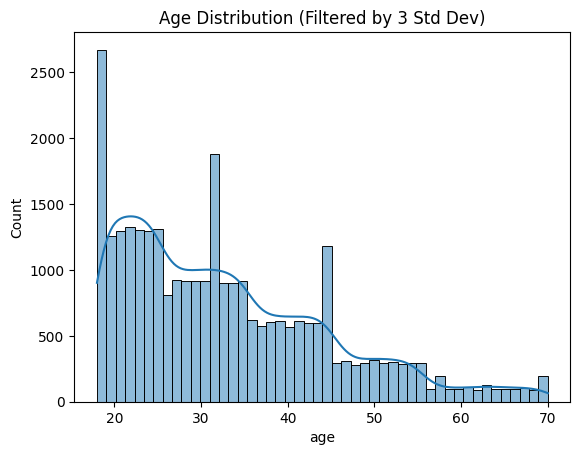

In [18]:
# Plot the histogram with KDE
sns.histplot(data=df_filtered, x='age', kde=True)
plt.title("Age Distribution (Filtered by 3 Std Dev)")
plt.show()

In [19]:
df_filtered.age.describe()

count    29991.000000
mean        32.947484
std         11.906077
min         18.000000
25%         23.000000
50%         31.000000
75%         40.000000
max         70.000000
Name: age, dtype: float64

## **Handling Missing Data - Income Column**

In [20]:
df_filtered.isna().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [21]:
df_filtered.income_levels.describe()

count         21931
unique            5
top       16L - 25L
freq           5897
Name: income_levels, dtype: object

In [22]:
df_filtered.income_levels.mode()

0    16L - 25L
Name: income_levels, dtype: object

In [23]:
df_filtered.income_levels.unique()

array(['<10L', '> 35L', '16L - 25L', nan, '10L - 15L', '26L - 35L'],
      dtype=object)

### *Imputing null values with "Not Reported"*

In [24]:
df_filtered.loc[:,'income_levels'] = df_filtered.loc[:,'income_levels'].fillna('Not Reported')
df_filtered.isna().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          8
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

In [25]:
df_filtered.income_levels.unique()

array(['<10L', '> 35L', '16L - 25L', 'Not Reported', '10L - 15L',
       '26L - 35L'], dtype=object)

## **Handling Missing Data - consume_frequency(weekly) Column**

In [26]:
df_filtered['consume_frequency(weekly)'].info()

<class 'pandas.core.series.Series'>
Index: 29991 entries, 0 to 30009
Series name: consume_frequency(weekly)
Non-Null Count  Dtype 
--------------  ----- 
29983 non-null  object
dtypes: object(1)
memory usage: 468.6+ KB


In [27]:
null_values_count = df_filtered['consume_frequency(weekly)'].isna().sum()
null_values_count

np.int64(8)

In [28]:
df_filtered['consume_frequency(weekly)'].unique()

array(['3-4 times', '5-7 times', '0-2 times', nan], dtype=object)

In [29]:
mode_value = df_filtered['consume_frequency(weekly)'].mode()
mode_value

0    3-4 times
Name: consume_frequency(weekly), dtype: object

In [30]:
df_filtered['consume_frequency(weekly)'].value_counts(normalize=True)

consume_frequency(weekly)
3-4 times    0.393089
5-7 times    0.325985
0-2 times    0.280926
Name: proportion, dtype: float64

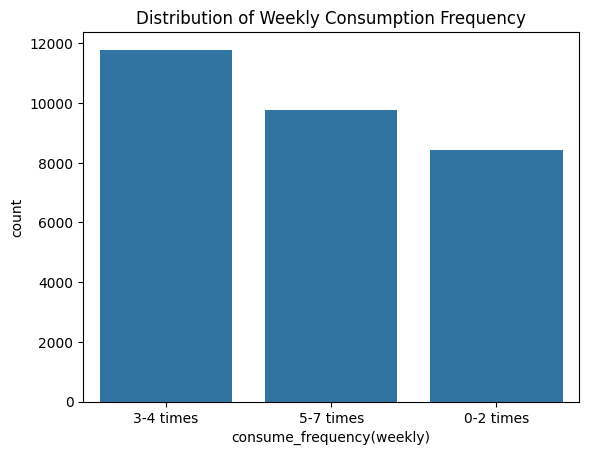

In [31]:
sns.countplot(x='consume_frequency(weekly)', data=df_filtered)
plt.title("Distribution of Weekly Consumption Frequency")
plt.show()

In [32]:
mode_value = df_filtered['consume_frequency(weekly)'].mode()[0]
mode_percentage = df_filtered['consume_frequency(weekly)'].value_counts(normalize=True).iloc[0] * 100

print(f"Mode: {mode_value}, Percentage: {mode_percentage:.2f}%")


Mode: 3-4 times, Percentage: 39.31%


### *Imputing null values with mode*

In [33]:
df_filtered.loc[:,'consume_frequency(weekly)'] = df_filtered.loc[:,'consume_frequency(weekly)'].fillna('3-4 times')

In [34]:
df_filtered.isna().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          0
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

## **Handling Missing Data - purchase_channels Column**

In [35]:
df_filtered['purchase_channel'].unique()

array(['Online', 'Retail Store', nan], dtype=object)

In [36]:
df_filtered['purchase_channel'].mode()

0    Online
Name: purchase_channel, dtype: object

In [37]:
df_filtered['purchase_channel'].value_counts(normalize=True)

purchase_channel
Online          0.552417
Retail Store    0.447583
Name: proportion, dtype: float64

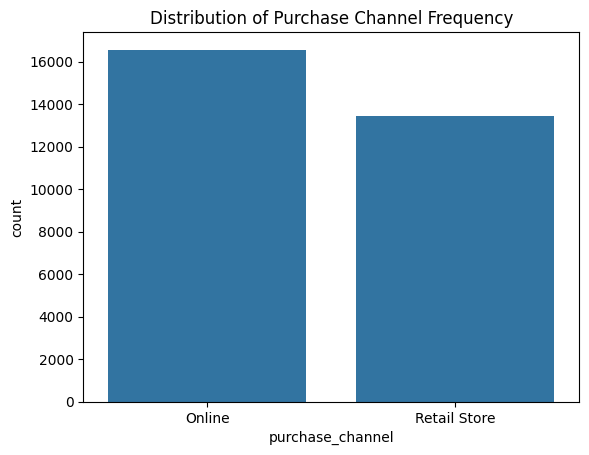

In [38]:
sns.countplot(x='purchase_channel', data=df_filtered)
plt.title("Distribution of Purchase Channel Frequency")
plt.show()

### *Imputing null values with mode*

In [39]:
df_filtered.loc[:,'purchase_channel'] = df_filtered.loc[:,'purchase_channel'].fillna('Online')
df_filtered['purchase_channel'].unique()

array(['Online', 'Retail Store'], dtype=object)

In [40]:
df_filtered.isna().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

## **Correcting Spelling Mistakes in Categorical Data**

In [41]:
df_filtered['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [42]:
df_filtered['zone'].value_counts()

zone
Metro         11906
Urban         10686
Semi-Urban     5274
Rural          2116
urbna             5
Metor             4
Name: count, dtype: int64

In [43]:
df_filtered.loc[:,'zone'] = df_filtered.loc[:,'zone'].replace('Metor', 'Metro')
df_filtered['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'urbna'], dtype=object)

In [44]:
df_filtered.loc[:,'zone'] = df_filtered.loc[:,'zone'].replace('urbna', 'Urban')

In [45]:
df_filtered['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [46]:
df_filtered['current_brand'].unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [47]:
df_filtered.loc[:,'current_brand'] = df_filtered.loc[:,'current_brand'].replace('newcomer', 'Newcomer')
df_filtered.loc[:,'current_brand'] = df_filtered.loc[:,'current_brand'].replace('Establishd', 'Established')

In [48]:
df_filtered['current_brand'].unique()

array(['Newcomer', 'Established'], dtype=object)

## **Feature Engineering**

### *1 - Categorize Age into Age Groups*

In [49]:
df = df_filtered.copy()
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [50]:
def categorize_age(age):

    if age >= 18 and age <= 25:
        return "18-25"
    elif age >= 26 and age <= 35:
        return "26-35"
    elif age >= 36 and age <= 45:
        return "36-45"
    elif age >= 46 and age <= 55:
        return "46-55"
    elif age >= 56 and age <= 70:
        return "56-70"
    elif age > 70:
        return "70+"

In [51]:
df.loc[:,'age_group'] = df['age'].apply(categorize_age)
df.loc[:,'age_group'].value_counts()

age_group
18-25    10468
26-35     9093
36-45     5972
46-55     2966
56-70     1492
Name: count, dtype: int64

In [52]:
df = df.drop('age', axis=1)
df

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30005,R29996,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200,26-35
30006,R29997,F,Urban,Working Professional,> 35L,3-4 times,Established,Small (250 ml),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250,36-45
30007,R29998,F,Metro,Retired,<10L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),150-200,56-70
30008,R29999,M,Urban,Working Professional,16L - 25L,5-7 times,Established,Small (250 ml),above 4,Quality,Exotic,Online,Eco-Friendly,Medium (Moderately health-conscious),Social (eg. Parties),150-200,18-25


In [53]:
df[(df['price_range'] == '50-100') & (df['income_levels'] != 'Not Reported')]

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
66,R00067,M,Rural,Working Professional,<10L,0-2 times,Established,Large (1 L),0 to 1,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),Social (eg. Parties),50-100,26-35
389,R00390,M,Semi-Urban,Retired,<10L,0-2 times,Established,Small (250 ml),0 to 1,Availability,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,56-70
450,R00451,M,Semi-Urban,Working Professional,<10L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),Social (eg. Parties),50-100,18-25
592,R00593,F,Rural,Entrepreneur,10L - 15L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Simple,Low (Not very concerned),Social (eg. Parties),50-100,18-25
627,R00628,M,Rural,Working Professional,16L - 25L,0-2 times,Established,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Retail Store,Eco-Friendly,Low (Not very concerned),Casual (eg. At home),50-100,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29484,R29475,M,Metro,Working Professional,<10L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25
29589,R29580,M,Urban,Working Professional,<10L,0-2 times,Established,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25
29744,R29735,M,Semi-Urban,Working Professional,10L - 15L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Eco-Friendly,Low (Not very concerned),Casual (eg. At home),50-100,26-35
29815,R29806,F,Semi-Urban,Working Professional,<10L,0-2 times,Newcomer,Small (250 ml),0 to 1,Availability,Exotic,Retail Store,Premium,Low (Not very concerned),Social (eg. Parties),50-100,26-35


### *2 - Create `cf_ab_score` (Consume Frequency and Awareness Brand Score)*

In [54]:
df['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11794
5-7 times     9774
0-2 times     8423
Name: count, dtype: int64

In [55]:
df['awareness_of_other_brands'].value_counts()

awareness_of_other_brands
0 to 1     12966
2 to 4     11225
above 4     5800
Name: count, dtype: int64

In [56]:
import numpy as np

def calc_cf_ab_score(data):
    frequency_score = 0
    awareness_score = 0
    data

    if data['consume_frequency(weekly)'] == "0-2 times":
        frequency_score = 1
    elif data['consume_frequency(weekly)'] == "3-4 times":
        frequency_score = 2
    elif data['consume_frequency(weekly)'] == "5-7 times":
        frequency_score = 3

    if data['awareness_of_other_brands'] == "0 to 1":
        awareness_score = 1
    elif data['awareness_of_other_brands'] == "2 to 4":
        awareness_score = 2
    elif data['awareness_of_other_brands'] == "above 4":
        awareness_score = 3

    cf_ab_score = frequency_score/(awareness_score + frequency_score)

    return np.round(cf_ab_score,2)

In [57]:
df.loc[:,'cf_ab_score'] = df.apply(calc_cf_ab_score, axis=1)

In [58]:
df[['consume_frequency(weekly)', 'awareness_of_other_brands', 'cf_ab_score']].sample(10)

,consume_frequency(weekly),awareness_of_other_brands,cf_ab_score
22034,3-4 times,above 4,0.40
10197,5-7 times,2 to 4,0.60
8005,5-7 times,0 to 1,0.75
19476,0-2 times,0 to 1,0.50
27666,3-4 times,2 to 4,0.50
3347,5-7 times,2 to 4,0.60
6422,3-4 times,0 to 1,0.67
2994,3-4 times,0 to 1,0.67
4030,5-7 times,2 to 4,0.60
29675,5-7 times,0 to 1,0.75


In [59]:
df['cf_ab_score'].describe()

count    29991.000000
mean         0.537350
std          0.141866
min          0.250000
25%          0.500000
50%          0.500000
75%          0.670000
max          0.750000
Name: cf_ab_score, dtype: float64

### *3 - Create Zone Affluence Score (ZAS)*

In [60]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67


In [61]:
def calc_zas(data):
    zone_score = 0
    income_score = 0

    if data["zone"] == "Rural":
        zone_score = 1
    elif data["zone"] == "Semi-Urban":
        zone_score = 2
    elif data["zone"] == "Urban":
        zone_score = 3
    elif data["zone"] == "Metro":
        zone_score = 4

    if data["income_levels"] == "<10L":
        income_score = 1
    elif data["income_levels"] == "10L - 15L":
        income_score = 2
    elif data["income_levels"] == "16L - 25L":
        income_score = 3
    elif data["income_levels"] == "26L - 35L":
        income_score = 4
    elif data["income_levels"] == "> 35L":
        income_score = 5
    elif data["income_levels"] == "Not Reported":
        income_score = 0

    zas_score = zone_score * income_score
    return zas_score

In [62]:
df.loc[:,'zas_score'] = df[['zone', 'income_levels']].apply(calc_zas, axis=1)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0


In [63]:
df[['zone', 'income_levels', 'zas_score']].sample(5)

,zone,income_levels,zas_score
17818,Metro,16L - 25L,12
2566,Metro,10L - 15L,8
14514,Urban,<10L,3
17450,Urban,26L - 35L,12
21252,Urban,10L - 15L,6


In [64]:
df[['zone', 'income_levels', 'zas_score']].describe()

,zas_score
count,29991.000000
mean,6.096529
std,5.517959
min,0.000000
25%,0.000000
50%,6.000000
75%,9.000000
max,20.000000


In [65]:
df[df['zas_score'] == 20][['zone', 'income_levels', 'zas_score']]

,zone,income_levels,zas_score
1,Metro,> 35L,20
28,Metro,> 35L,20
39,Metro,> 35L,20
131,Metro,> 35L,20
148,Metro,> 35L,20
...,...,...,...
29874,Metro,> 35L,20
29891,Metro,> 35L,20
29911,Metro,> 35L,20
29917,Metro,> 35L,20


In [66]:
df['zas_score'].value_counts()

zas_score
0     8060
12    3671
4     3082
6     2991
8     2739
3     2085
9     2041
16    1508
2     1257
20     921
15     807
10     379
1      307
5      143
Name: count, dtype: int64

In [67]:
df['zas_score'].unique() # 14 unique values

array([ 3, 20,  5,  9,  0,  6, 12,  2,  4,  8, 15, 16,  1, 10])

### *4 - Brand Switching Indicator (BSI)*

In [68]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0


In [69]:
df['current_brand'].unique()

array(['Newcomer', 'Established'], dtype=object)

In [70]:
df['reasons_for_choosing_brands'].unique()

array(['Price', 'Quality', 'Availability', 'Brand Reputation'],
      dtype=object)

In [71]:
# Create a binary indicator column `bsi` that identifies if a respondent is
# likely to switch brands.

def calc_bsi(data):
    bsi = 0
    if data['current_brand'] != 'Established' and (data['reasons_for_choosing_brands'] == 'Price' or data['reasons_for_choosing_brands'] == 'Quality'):
        bsi = 1
    else:
        bsi = 0

    return bsi

In [72]:
df.loc[:,'bsi'] = df[['current_brand','reasons_for_choosing_brands']].apply(calc_bsi, axis=1)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [73]:
df[['current_brand','reasons_for_choosing_brands','bsi']].sample(5)

,current_brand,reasons_for_choosing_brands,bsi
28024,Newcomer,Availability,0
18507,Established,Price,0
21188,Newcomer,Price,1
24721,Established,Brand Reputation,0
4588,Established,Brand Reputation,0


### *5 - Removing Logical Outliers*

In [74]:
pd.crosstab(df['age_group'], df['occupation'])

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,35,106


In [75]:
len(df[(df['age_group'] == '56-70') & (df['occupation'] == 'Student')])

35

In [76]:
df[(df['age_group'] == '56-70') & (df['occupation'] == 'Student')].head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
182,R00183,F,Urban,Student,Not Reported,5-7 times,Established,Large (1 L),above 4,Price,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200,56-70,0.50,0,0
3526,R03525,F,Semi-Urban,Student,Not Reported,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Eco-Friendly,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,56-70,0.50,0,0
3527,R03526,M,Semi-Urban,Student,Not Reported,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Exotic,Retail Store,Eco-Friendly,High (Very health-conscious),Casual (eg. At home),100-150,56-70,0.33,0,1
3772,R03771,M,Metro,Student,Not Reported,5-7 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",150-200,56-70,0.60,0,0
4033,R04032,M,Urban,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Social (eg. Parties),150-200,56-70,0.67,0,0


In [77]:
index_drop = df[(df['age_group'] == '56-70') & (df['occupation'] == 'Student')].index
index_drop

Index([  182,  3526,  3527,  3772,  4033,  6545,  6594,  6648,  7420,  7596,
        7841,  9090,  9198, 11877, 12031, 12471, 15711, 16230, 16829, 17202,
       19103, 20218, 21422, 24252, 24885, 25090, 25133, 25443, 25544, 25723,
       25819, 26066, 26851, 28578, 28910],
      dtype='int64')

In [78]:
df = df.drop(index_drop)
pd.crosstab(df['age_group'], df['occupation'])

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,0,106


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29956 entries, 0 to 30009
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   respondent_id                   29956 non-null  object 
 1   gender                          29956 non-null  object 
 2   zone                            29956 non-null  object 
 3   occupation                      29956 non-null  object 
 4   income_levels                   29956 non-null  object 
 5   consume_frequency(weekly)       29956 non-null  object 
 6   current_brand                   29956 non-null  object 
 7   preferable_consumption_size     29956 non-null  object 
 8   awareness_of_other_brands       29956 non-null  object 
 9   reasons_for_choosing_brands     29956 non-null  object 
 10  flavor_preference               29956 non-null  object 
 11  purchase_channel                29956 non-null  object 
 12  packaging_preference            29956

In [80]:
df[df['bsi'] == 0]

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0
5,R00006,F,Urban,Student,Not Reported,5-7 times,Established,Large (1 L),2 to 4,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",100-150,18-25,0.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30004,R29995,M,Semi-Urban,Retired,<10L,5-7 times,Newcomer,Small (250 ml),2 to 4,Availability,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200,56-70,0.60,2,0
30005,R29996,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200,26-35,0.50,12,0
30006,R29997,F,Urban,Working Professional,> 35L,3-4 times,Established,Small (250 ml),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250,36-45,0.50,15,0
30007,R29998,F,Metro,Retired,<10L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),150-200,56-70,0.50,4,0


## **Predictive Modeling**

### *1 - Prepare Features and Target Variables*

In [81]:
df = df.drop('respondent_id', axis=1)
df.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [82]:
X = df.drop('price_range', axis=1)
y = df[['price_range']]

In [83]:
X.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.67,3,1
1,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.60,20,0
2,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",36-45,0.50,5,0
3,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.75,9,0
4,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.67,0,0


In [84]:
y.head()

,price_range
0,100-150
1,200-250
2,200-250
3,150-200
4,50-100


### *2 - Data Splitting (Train and Test)*

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [86]:
X_train.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
8391,F,Semi-Urban,Working Professional,10L - 15L,0-2 times,Newcomer,Small (250 ml),above 4,Availability,Traditional,Online,Simple,Low (Not very concerned),Social (eg. Parties),18-25,0.25,4,0
26395,F,Urban,Working Professional,16L - 25L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Traditional,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),18-25,0.60,9,0
11276,F,Urban,Student,Not Reported,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.50,0,1
9110,M,Metro,Working Professional,16L - 25L,3-4 times,Established,Large (1 L),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.50,12,0
3373,M,Metro,Entrepreneur,16L - 25L,0-2 times,Established,Large (1 L),above 4,Brand Reputation,Traditional,Online,Eco-Friendly,Medium (Moderately health-conscious),Casual (eg. At home),26-35,0.25,12,0


In [87]:
X_test.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
11981,M,Urban,Student,Not Reported,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),18-25,0.75,0,0
1805,M,Metro,Working Professional,10L - 15L,0-2 times,Newcomer,Small (250 ml),above 4,Price,Exotic,Online,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",18-25,0.25,8,1
517,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.25,12,0
3820,F,Metro,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),2 to 4,Quality,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",46-55,0.60,12,1
28625,M,Metro,Entrepreneur,26L - 35L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Quality,Exotic,Online,Premium,High (Very health-conscious),Casual (eg. At home),36-45,0.75,16,1


In [88]:
X_train['awareness_of_other_brands']

8391     above 4
26395     2 to 4
11276     2 to 4
9110      2 to 4
3373     above 4
          ...   
29856    above 4
5399      2 to 4
861       0 to 1
15821     0 to 1
23691     0 to 1
Name: awareness_of_other_brands, Length: 22467, dtype: object

In [89]:
y_train.head()

,price_range
8391,50-100
26395,200-250
11276,100-150
9110,150-200
3373,150-200


In [90]:
y_test.head()

,price_range
11981,50-100
1805,150-200
517,200-250
3820,200-250
28625,200-250


In [91]:
df_train = pd.concat((X_train, y_train), axis=1)
df_train

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi,price_range
8391,F,Semi-Urban,Working Professional,10L - 15L,0-2 times,Newcomer,Small (250 ml),above 4,Availability,Traditional,Online,Simple,Low (Not very concerned),Social (eg. Parties),18-25,0.25,4,0,50-100
26395,F,Urban,Working Professional,16L - 25L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Traditional,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),18-25,0.60,9,0,200-250
11276,F,Urban,Student,Not Reported,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.50,0,1,100-150
9110,M,Metro,Working Professional,16L - 25L,3-4 times,Established,Large (1 L),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.50,12,0,150-200
3373,M,Metro,Entrepreneur,16L - 25L,0-2 times,Established,Large (1 L),above 4,Brand Reputation,Traditional,Online,Eco-Friendly,Medium (Moderately health-conscious),Casual (eg. At home),26-35,0.25,12,0,150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29856,F,Urban,Entrepreneur,> 35L,0-2 times,Established,Small (250 ml),above 4,Quality,Exotic,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),56-70,0.25,15,0,200-250
5399,F,Metro,Working Professional,16L - 25L,5-7 times,Newcomer,Large (1 L),2 to 4,Quality,Traditional,Retail Store,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.60,12,1,200-250
861,M,Rural,Working Professional,10L - 15L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),Social (eg. Parties),36-45,0.50,2,0,50-100
15821,F,Semi-Urban,Entrepreneur,10L - 15L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Exotic,Online,Eco-Friendly,High (Very health-conscious),Social (eg. Parties),26-35,0.67,4,1,150-200


In [92]:
df_test = pd.concat((X_test, y_test), axis=1)
df_test

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi,price_range
11981,M,Urban,Student,Not Reported,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),18-25,0.75,0,0,50-100
1805,M,Metro,Working Professional,10L - 15L,0-2 times,Newcomer,Small (250 ml),above 4,Price,Exotic,Online,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",18-25,0.25,8,1,150-200
517,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.25,12,0,200-250
3820,F,Metro,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),2 to 4,Quality,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",46-55,0.60,12,1,200-250
28625,M,Metro,Entrepreneur,26L - 35L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Quality,Exotic,Online,Premium,High (Very health-conscious),Casual (eg. At home),36-45,0.75,16,1,200-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,F,Metro,Entrepreneur,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),26-35,0.50,16,0,200-250
23785,F,Urban,Working Professional,26L - 35L,5-7 times,Newcomer,Small (250 ml),2 to 4,Quality,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),26-35,0.60,12,1,200-250
4077,M,Urban,Working Professional,26L - 35L,5-7 times,Newcomer,Medium (500 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.60,12,0,200-250
5644,M,Urban,Working Professional,<10L,3-4 times,Established,Large (1 L),0 to 1,Price,Traditional,Online,Premium,High (Very health-conscious),Social (eg. Parties),46-55,0.67,3,0,150-200


In [93]:
df = pd.concat((df_train, df_test))
df

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi,price_range
8391,F,Semi-Urban,Working Professional,10L - 15L,0-2 times,Newcomer,Small (250 ml),above 4,Availability,Traditional,Online,Simple,Low (Not very concerned),Social (eg. Parties),18-25,0.25,4,0,50-100
26395,F,Urban,Working Professional,16L - 25L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Traditional,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),18-25,0.60,9,0,200-250
11276,F,Urban,Student,Not Reported,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.50,0,1,100-150
9110,M,Metro,Working Professional,16L - 25L,3-4 times,Established,Large (1 L),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.50,12,0,150-200
3373,M,Metro,Entrepreneur,16L - 25L,0-2 times,Established,Large (1 L),above 4,Brand Reputation,Traditional,Online,Eco-Friendly,Medium (Moderately health-conscious),Casual (eg. At home),26-35,0.25,12,0,150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,F,Metro,Entrepreneur,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),26-35,0.50,16,0,200-250
23785,F,Urban,Working Professional,26L - 35L,5-7 times,Newcomer,Small (250 ml),2 to 4,Quality,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),26-35,0.60,12,1,200-250
4077,M,Urban,Working Professional,26L - 35L,5-7 times,Newcomer,Medium (500 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.60,12,0,200-250
5644,M,Urban,Working Professional,<10L,3-4 times,Established,Large (1 L),0 to 1,Price,Traditional,Online,Premium,High (Very health-conscious),Social (eg. Parties),46-55,0.67,3,0,150-200


In [94]:
X_train.columns

Index(['gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'age_group', 'cf_ab_score',
       'zas_score', 'bsi'],
      dtype='object')

### *2 - Feature Encoding*

In [95]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# # Columns to encode
# columns_to_encode = ['age_group', 'income_levels', 'health_concerns',
#                      'consume_frequency(weekly)', 'preferable_consumption_size']

# # Apply label encoding using a loop
# for column in columns_to_encode:
#     le.fit(X_train[column])  # Fit the encoder only on X_train
#     X_train[column] = le.transform(X_train[column])  # Transform X_train
#     X_test[column] = le.transform(X_test[column])  # Transform X_test

# X_train.head()


In [96]:
# Specify the categorical columns
categorical_columns = ['income_levels', 'consume_frequency(weekly)',
                        'preferable_consumption_size', 'health_concerns', 'age_group',
                        'gender', 'zone', 'occupation', 'current_brand',
                        'awareness_of_other_brands', 'reasons_for_choosing_brands',
                        'flavor_preference', 'purchase_channel',
                        'packaging_preference', 'typical_consumption_situations']

# Extract unique values for each categorical column
unique_values = {col: X_train[col].unique() for col in categorical_columns}

# Display the results
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}\n")


Column: income_levels
Unique Values: ['10L - 15L' '16L - 25L' 'Not Reported' '<10L' '> 35L' '26L - 35L']

Column: consume_frequency(weekly)
Unique Values: ['0-2 times' '5-7 times' '3-4 times']

Column: preferable_consumption_size
Unique Values: ['Small (250 ml)' 'Medium (500 ml)' 'Large (1 L)']

Column: health_concerns
Unique Values: ['Low (Not very concerned)' 'Medium (Moderately health-conscious)'
 'High (Very health-conscious)']

Column: age_group
Unique Values: ['18-25' '26-35' '36-45' '56-70' '46-55']

Column: gender
Unique Values: ['F' 'M']

Column: zone
Unique Values: ['Semi-Urban' 'Urban' 'Metro' 'Rural']

Column: occupation
Unique Values: ['Working Professional' 'Student' 'Entrepreneur' 'Retired']

Column: current_brand
Unique Values: ['Newcomer' 'Established']

Column: awareness_of_other_brands
Unique Values: ['above 4' '2 to 4' '0 to 1']

Column: reasons_for_choosing_brands
Unique Values: ['Availability' 'Quality' 'Price' 'Brand Reputation']

Column: flavor_preference
Unique

In [97]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Assuming X_train and X_test are your dataframes
oe = OrdinalEncoder()
# Columns to encode
columns_to_encode = ['age_group', 'income_levels', 'health_concerns',
                     'consume_frequency(weekly)', 'preferable_consumption_size']

# Define the OrdinalEncoder with custom ordering
oe = OrdinalEncoder(categories=[
    ['18-25', '26-35', '36-45', '46-55', '56-70'],  # age_group
    ['Not Reported','<10L', '10L - 15L', '16L - 25L', '26L - 35L', '> 35L'],  # income_levels
    ['Low (Not very concerned)', 'Medium (Moderately health-conscious)', 'High (Very health-conscious)'],  # health_concerns
    ['0-2 times', '3-4 times', '5-7 times'],  # consume_frequency(weekly)
    ['Small (250 ml)', 'Medium (500 ml)', 'Large (1 L)'],  # preferable_consumption_size
], dtype=int)

# Fit the encoder on the training data
oe.fit(X_train[columns_to_encode])

# Transform both X_train and X_test using the fitted encoder
X_train[columns_to_encode] = oe.transform(X_train[columns_to_encode])


X_test[columns_to_encode] = oe.transform(X_test[columns_to_encode])

# Check the transformed data
X_train.head()


,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
8391,F,Semi-Urban,Working Professional,2,0,Newcomer,0,above 4,Availability,Traditional,Online,Simple,0,Social (eg. Parties),0,0.25,4,0
26395,F,Urban,Working Professional,3,2,Established,1,2 to 4,Quality,Traditional,Online,Premium,1,Social (eg. Parties),0,0.60,9,0
11276,F,Urban,Student,0,1,Newcomer,0,2 to 4,Price,Traditional,Online,Simple,1,"Active (eg. Sports, gym)",0,0.50,0,1
9110,M,Metro,Working Professional,3,1,Established,2,2 to 4,Quality,Traditional,Online,Premium,0,"Active (eg. Sports, gym)",1,0.50,12,0
3373,M,Metro,Entrepreneur,3,0,Established,2,above 4,Brand Reputation,Traditional,Online,Eco-Friendly,1,Casual (eg. At home),1,0.25,12,0


In [98]:
X_test.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
11981,M,Urban,Student,0,2,Established,2,0 to 1,Price,Exotic,Online,Simple,1,Social (eg. Parties),0,0.75,0,0
1805,M,Metro,Working Professional,2,0,Newcomer,0,above 4,Price,Exotic,Online,Simple,2,"Active (eg. Sports, gym)",0,0.25,8,1
517,M,Metro,Working Professional,3,0,Established,1,above 4,Brand Reputation,Exotic,Retail Store,Premium,1,"Active (eg. Sports, gym)",1,0.25,12,0
3820,F,Metro,Working Professional,3,2,Newcomer,1,2 to 4,Quality,Traditional,Retail Store,Premium,1,"Active (eg. Sports, gym)",3,0.60,12,1
28625,M,Metro,Entrepreneur,4,2,Newcomer,1,0 to 1,Quality,Exotic,Online,Premium,2,Casual (eg. At home),2,0.75,16,1


In [99]:
# columns_to_ohe = ['gender', 'zone', 'occupation', 'current_brand','awareness_of_other_brands', 'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel', 'packaging_preference', 'typical_consumption_situations']

# X_train = pd.get_dummies(X_train, columns=columns_to_ohe, drop_first=True, dtype=int)
# X_train.head()

In [100]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import joblib  # For exporting the encoder

# Columns to one-hot encode
columns_to_ohe = ['gender', 'zone', 'occupation', 'current_brand', 'awareness_of_other_brands',
                  'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
                  'packaging_preference', 'typical_consumption_situations']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first', dtype=int, sparse_output=False)

# Fit and transform the specified columns
X_train_encoded = ohe.fit_transform(X_train[columns_to_ohe])

# Convert the result into a DataFrame with meaningful column names
ohe_columns = ohe.get_feature_names_out(columns_to_ohe)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe_columns, index=X_train.index)

# Concatenate the original DataFrame (excluding the encoded columns) with the new encoded DataFrame
X_train = pd.concat([X_train.drop(columns=columns_to_ohe), X_train_encoded_df], axis=1)

# Export the OneHotEncoder for reuse
joblib.dump(ohe, 'one_hot_encoder.joblib')

# Display the first few rows
X_train.head()


,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,zone_Rural,...,awareness_of_other_brands_above 4,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
8391,2,0,0,0,0,0.25,4,0,0,0,...,1,0,0,0,1,0,0,1,0,1
26395,3,2,1,1,0,0.60,9,0,0,0,...,0,0,0,1,1,0,1,0,0,1
11276,0,1,0,1,0,0.50,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
9110,3,1,2,0,1,0.50,12,0,1,0,...,0,0,0,1,1,0,1,0,0,0
3373,3,0,2,1,1,0.25,12,0,1,0,...,1,1,0,0,1,0,0,0,1,0


In [101]:
# X_test = pd.get_dummies(X_test, columns=columns_to_ohe, drop_first=True, dtype=int)
# X_test.head()

In [102]:
# Fit and transform the specified columns
X_test_encoded = ohe.transform(X_test[columns_to_ohe])

# Convert the result into a DataFrame with meaningful column names
ohe_columns = ohe.get_feature_names_out(columns_to_ohe)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe_columns, index=X_test.index)

# Concatenate the original DataFrame (excluding the encoded columns) with the new encoded DataFrame
X_test = pd.concat([X_test.drop(columns=columns_to_ohe), X_test_encoded_df], axis=1)

# Display the first few rows
X_test.head()

,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,zone_Rural,...,awareness_of_other_brands_above 4,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
11981,0,2,2,1,0,0.75,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
1805,2,0,0,2,0,0.25,8,1,1,0,...,1,0,1,0,0,0,0,1,0,0
517,3,0,1,1,1,0.25,12,0,1,0,...,1,1,0,0,0,1,1,0,0,0
3820,3,2,1,1,3,0.60,12,1,0,0,...,0,0,0,1,1,1,1,0,0,0
28625,4,2,1,2,2,0.75,16,1,1,0,...,0,0,0,1,0,0,1,0,1,0


In [103]:
y_test['price_range'].unique()

array(['50-100', '150-200', '200-250', '100-150'], dtype=object)

In [104]:
oe_target = OrdinalEncoder(categories=[
    ['50-100','100-150','150-200','200-250']
], dtype=int) 
y_train[['price_range']] = oe_target.fit_transform(y_train[['price_range']])
y_test[['price_range']] = oe_target.transform(y_test[['price_range']])

In [105]:
# y_train['price_range'] = le.fit_transform(y_train['price_range'])
# y_test['price_range'] = le.transform(y_test['price_range'])

In [106]:
y_train.head()

,price_range
8391,0
26395,3
11276,1
9110,2
3373,2


In [107]:
y_test.head()

,price_range
11981,0
1805,2
517,3
3820,3
28625,3


### *3 - Model Selection*

#### *a. Gaussian Naive Bayes*

In [108]:
y_train.values

array([[0],
       [3],
       [1],
       ...,
       [0],
       [2],
       [0]])

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())

GaussianNB()

In [107]:
y_pred = gnb.predict(X_test)
print('Gaussian Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))

Gaussian Naive Bayes Accuracy: 0.5803177994391775


#### *a. Gaussian Naive Bayes - Hyperparameter Tuning*

In [108]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Set up GridSearchCV
grid_search_gnb = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the GridSearchCV
grid_search_gnb.fit(X_train, y_train.values.ravel())

# Best parameters and score
gnb_best_params = grid_search_gnb.best_params_
print("Best Parameters:", gnb_best_params)
print("Best Cross-Validated Accuracy:", grid_search_gnb.best_score_)

# Evaluate on test data
gnb_best_model = grid_search_gnb.best_estimator_
y_pred = gnb_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'var_smoothing': 0.001}
Best Cross-Validated Accuracy: 0.5965191266719501
Test Accuracy: 0.5956736546935505


In [109]:
gnb_cm = classification_report(y_test, y_pred)
print('Gaussian Naive Nayes Classification Report:')
print(gnb_cm)

Gaussian Naive Nayes Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.92      0.60       906
           1       0.49      0.27      0.35      1930
           2       0.57      0.51      0.54      2223
           3       0.78      0.81      0.79      2430

    accuracy                           0.60      7489
   macro avg       0.57      0.63      0.57      7489
weighted avg       0.60      0.60      0.58      7489



In [110]:
gnb_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('Gaussian Naive Nayes Classification Report:')
gnb_dict_report

Gaussian Naive Nayes Classification Report:


{'0': {'precision': 0.4442658092175777,
  'recall': 0.9150110375275938,
  'f1-score': 0.5981240981240982,
  'support': 906.0},
 '1': {'precision': 0.4857928505957837,
  'recall': 0.27461139896373055,
  'f1-score': 0.3508771929824561,
  'support': 1930.0},
 '2': {'precision': 0.5674603174603174,
  'recall': 0.5146198830409356,
  'f1-score': 0.5397499410238263,
  'support': 2223.0},
 '3': {'precision': 0.7782193958664547,
  'recall': 0.805761316872428,
  'f1-score': 0.7917509098261222,
  'support': 2430.0},
 'accuracy': 0.5956736546935505,
 'macro avg': {'precision': 0.5689345932850334,
  'recall': 0.6275009091011721,
  'f1-score': 0.5701255354891257,
  'support': 7489.0},
 'weighted avg': {'precision': 0.5998961733837307,
  'recall': 0.5956736546935505,
  'f1-score': 0.5799054940753126,
  'support': 7489.0}}

In [111]:
import mlflow

In [112]:
gnb_best_params

{'var_smoothing': 0.001}

In [113]:
!pip install dagshub


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
import dagshub
dagshub.init(repo_owner='marvelousmaaz04', repo_name='codebasics-virtual-internship', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=dba9bbe3-72fe-4d10-bb90-26b6d84a5f38&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=c7563347be2338e00577e585f5b129671d2cc245e2c7084f91c27624f5bf5047




Accessing as marvelousmaaz04

Initialized MLflow to track repo "marvelousmaaz04/codebasics-virtual-internship"

Repository marvelousmaaz04/codebasics-virtual-internship initialized!

In [115]:
mlflow.set_experiment("Beverage Price Prediction")
# mlflow.set_tracking_uri("http://127.0.0.1:5000/") # for local experiments
mlflow.set_tracking_uri("https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow") # now experiments will be tracked on dagshub

with mlflow.start_run(run_name="Gaussian Naive Bayes"):
    mlflow.log_params(gnb_best_params)
    mlflow.log_metrics({
        'accuracy': gnb_dict_report['accuracy'],
        'f1_score_macro': gnb_dict_report['macro avg']['f1-score'],
        'precision_class_0': gnb_dict_report['0']['precision'],
        'precision_class_1': gnb_dict_report['1']['precision'],
        'precision_class_2': gnb_dict_report['2']['precision'],
        'precision_class_3': gnb_dict_report['3']['precision'],
        'recall_class_0': gnb_dict_report['0']['recall'],
        'recall_class_1': gnb_dict_report['1']['recall'],
        'recall_class_2': gnb_dict_report['2']['recall'],
        'recall_class_3': gnb_dict_report['3']['recall'],
        'cross_validated_accuracy': grid_search_gnb.best_score_
    })
    mlflow.sklearn.log_model(gnb_best_model, 'Gaussian Naive Bayes')

2024/12/25 19:12:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gaussian Naive Bayes at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0/runs/81bb3e1c2aba4039b1b36e1f0effd3b6
🧪 View experiment at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0


In [116]:
import joblib

joblib.dump(gnb_best_model, 'gnb_checkpoint.joblib')

['gnb_checkpoint.joblib']

#### *b. Logistic Regression*

In [117]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [118]:
y_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8464414474562691


#### *b. Logistic Regression - Hyperparameter Tuning*

In [119]:
# Define the model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Define the parameter grid
param_grid = {
    'penalty': ['l2'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'class_weight': [None, 'balanced']  # Handle imbalanced classes
}

# Set up GridSearchCV
grid_search_logreg = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the GridSearchCV
grid_search_logreg.fit(X_train, y_train.values.ravel())

# Best parameters and score
logreg_best_params = grid_search_logreg.best_params_
print("Best Parameters:", logreg_best_params)
print("Best Cross-Validated Accuracy:", grid_search_logreg.best_score_)

# Evaluate on test data
logreg_best_model = grid_search_logreg.best_estimator_
y_pred = logreg_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Best Cross-Validated Accuracy: 0.8522722038762567
Test Accuracy: 0.8496461476832688


In [120]:
logreg_cm = classification_report(y_test, y_pred)
print('Logistic Regression Classification Report:')
print(logreg_cm)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       906
           1       0.81      0.83      0.82      1930
           2       0.81      0.81      0.81      2223
           3       0.91      0.91      0.91      2430

    accuracy                           0.85      7489
   macro avg       0.85      0.84      0.85      7489
weighted avg       0.85      0.85      0.85      7489



In [121]:
logreg_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('Logistic Regression Classification Report:')
logreg_dict_report

Logistic Regression Classification Report:


{'0': {'precision': 0.8506271379703535,
  'recall': 0.8233995584988962,
  'f1-score': 0.8367919237240605,
  'support': 906.0},
 '1': {'precision': 0.8140960163432074,
  'recall': 0.8259067357512954,
  'f1-score': 0.8199588477366255,
  'support': 1930.0},
 '2': {'precision': 0.8114054782218231,
  'recall': 0.8128654970760234,
  'f1-score': 0.8121348314606741,
  'support': 2223.0},
 '3': {'precision': 0.9130613926658426,
  'recall': 0.9119341563786009,
  'f1-score': 0.912497426394894,
  'support': 2430.0},
 'accuracy': 0.8496461476832688,
 'macro avg': {'precision': 0.8472975063003068,
  'recall': 0.8435264869262039,
  'f1-score': 0.8453457573290635,
  'support': 7489.0},
 'weighted avg': {'precision': 0.8498286901867594,
  'recall': 0.8496461476832688,
  'f1-score': 0.8496993638005551,
  'support': 7489.0}}

In [122]:
joblib.dump(logreg_best_model, 'logistic_regression_checkpoint.joblib')

['logistic_regression_checkpoint.joblib']

In [123]:
mlflow.set_experiment("Beverage Price Prediction")
# mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="Logistic Regression"):
    mlflow.log_params(logreg_best_params)
    mlflow.log_metrics({
        'accuracy': logreg_dict_report['accuracy'],
        'f1_score_macro': logreg_dict_report['macro avg']['f1-score'],
        'precision_class_0': logreg_dict_report['0']['precision'],
        'precision_class_1': logreg_dict_report['1']['precision'],
        'precision_class_2': logreg_dict_report['2']['precision'],
        'precision_class_3': logreg_dict_report['3']['precision'],
        'recall_class_0': logreg_dict_report['0']['recall'],
        'recall_class_1': logreg_dict_report['1']['recall'],
        'recall_class_2': logreg_dict_report['2']['recall'],
        'recall_class_3': logreg_dict_report['3']['recall'],
        'cross_validated_accuracy': grid_search_logreg.best_score_
    })
    mlflow.sklearn.log_model(logreg_best_model, 'Logistic Regression')

2024/12/25 19:13:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0/runs/8fcda5e4e0aa4453b80c87ec70c90b71
🧪 View experiment at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0


#### *c. Support Vector Machine (SVM)*

In [124]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train.values.ravel())

SVC()

In [125]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svc.predict(X_test)
print('Support Vector Machine Accuracy:', accuracy_score(y_test, y_pred))

Support Vector Machine Accuracy: 0.8541861396715182


#### *c. Support Vector Machine (SVM) - Hyperparameter Tuning*

In [126]:
from sklearn.model_selection import RandomizedSearchCV
# Define the model
svc = SVC(kernel='rbf')  # Using RBF kernel (default)

# Define the parameter grid
param_dist = {
    'C': [10, 100],  # Regularization parameter
    'gamma': [1, 0.1,],  # Kernel coefficient
    'class_weight': [None, 'balanced']  # Handle imbalanced classes
}

# Set up GridSearchCV
random_search_svc = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    scoring='accuracy',  # Metric to optimize
    cv=3,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    n_iter=8,
    random_state=42
)

# Fit the GridSearchCV
random_search_svc.fit(X_train, y_train.values.ravel())

# Best parameters and score
svc_best_params = random_search_svc.best_params_
print("Best Parameters:", random_search_svc.best_params_)
print("Best Cross-Validated Accuracy:", random_search_svc.best_score_)

# Evaluate on test data
svc_best_model = random_search_svc.best_estimator_
y_pred = svc_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'gamma': 0.1, 'class_weight': None, 'C': 10}
Best Cross-Validated Accuracy: 0.8986958650465127
Test Accuracy: 0.9074642809453866


In [127]:
svc_cm = classification_report(y_test, y_pred)
print('Support Vector Machine Classification Report:')
print(svc_cm)

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       906
           1       0.89      0.90      0.90      1930
           2       0.88      0.87      0.88      2223
           3       0.94      0.94      0.94      2430

    accuracy                           0.91      7489
   macro avg       0.91      0.91      0.91      7489
weighted avg       0.91      0.91      0.91      7489



In [128]:
svc_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('Support Vector Machine Classification Report:')
svc_dict_report

Support Vector Machine Classification Report:


{'0': {'precision': 0.9224806201550387,
  'recall': 0.9194260485651214,
  'f1-score': 0.9209508015478165,
  'support': 906.0},
 '1': {'precision': 0.8933880061506919,
  'recall': 0.9031088082901555,
  'f1-score': 0.8982221077042,
  'support': 1930.0},
 '2': {'precision': 0.8783355947535052,
  'recall': 0.8735942420152947,
  'f1-score': 0.87595850248083,
  'support': 2223.0},
 '3': {'precision': 0.9397689768976898,
  'recall': 0.9374485596707819,
  'f1-score': 0.938607334157396,
  'support': 2430.0},
 'accuracy': 0.9074642809453866,
 'macro avg': {'precision': 0.9084932994892314,
  'recall': 0.9083944146353384,
  'f1-score': 0.9084346864725605,
  'support': 7489.0},
 'weighted avg': {'precision': 0.907488975127484,
  'recall': 0.9074642809453866,
  'f1-score': 0.9074671741339012,
  'support': 7489.0}}

In [129]:
import joblib

# Save the model after each important step
joblib.dump(svc_best_model, 'svm_checkpoint.joblib')

['svm_checkpoint.joblib']

In [130]:
mlflow.set_experiment("Beverage Price Prediction")
# mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="Support Vector Machine"):
    mlflow.log_params(svc_best_params)
    mlflow.log_metrics({
        'accuracy': svc_dict_report['accuracy'],
        'f1_score_macro': svc_dict_report['macro avg']['f1-score'],
        'precision_class_0': svc_dict_report['0']['precision'],
        'precision_class_1': svc_dict_report['1']['precision'],
        'precision_class_2': svc_dict_report['2']['precision'],
        'precision_class_3': svc_dict_report['3']['precision'],
        'recall_class_0': svc_dict_report['0']['recall'],
        'recall_class_1': svc_dict_report['1']['recall'],
        'recall_class_2': svc_dict_report['2']['recall'],
        'recall_class_3': svc_dict_report['3']['recall'],
        'cross_validated_accuracy': random_search_svc.best_score_
    })
    mlflow.sklearn.log_model(svc_best_model, 'Support Vector Machine')

2024/12/25 19:20:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Support Vector Machine at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0/runs/264168e636414cc593f72e6da405facb
🧪 View experiment at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0


#### *d. Random Forest*

In [131]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [132]:
y_pred = random_forest.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.9011884096675123


#### *d. Random Forest - Hyperparameter Tuning*

In [133]:
import numpy as np

# Define the model
random_forest = RandomForestClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether to use bootstrap samples when building trees
}

# Set up RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=15,  # Number of random combinations to try
    scoring='accuracy',  # Metric to optimize
    cv=2,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV
random_search_rf.fit(X_train, y_train.values.ravel())

# Best parameters and score
random_forest_best_params = random_search_rf.best_params_
print("Best Parameters:", random_forest_best_params)
print("Best Cross-Validated Accuracy:", random_search_rf.best_score_)

# Evaluate on test data
random_forest_best_model = random_search_rf.best_estimator_
y_pred = random_forest_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 2 folds for each of 15 candidates, totalling 30 fits


C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Cross-Validated Accuracy: 0.8886812816157332
Test Accuracy: 0.9071972225931366


In [134]:
random_forest_cm = classification_report(y_test, y_pred)
print('Random Forest Classification Report:')
print(random_forest_cm)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       906
           1       0.90      0.88      0.89      1930
           2       0.87      0.90      0.88      2223
           3       0.95      0.94      0.94      2430

    accuracy                           0.91      7489
   macro avg       0.91      0.90      0.91      7489
weighted avg       0.91      0.91      0.91      7489



In [135]:
random_forest_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('Random Forest Classification Report:')
random_forest_dict_report

Random Forest Classification Report:


{'0': {'precision': 0.9303944315545244,
  'recall': 0.8852097130242825,
  'f1-score': 0.9072398190045249,
  'support': 906.0},
 '1': {'precision': 0.897206114918292,
  'recall': 0.8818652849740932,
  'f1-score': 0.8894695584008362,
  'support': 1930.0},
 '2': {'precision': 0.865916955017301,
  'recall': 0.9005847953216374,
  'f1-score': 0.8829106945975744,
  'support': 2223.0},
 '3': {'precision': 0.946236559139785,
  'recall': 0.9415637860082304,
  'f1-score': 0.9438943894389439,
  'support': 2430.0},
 'accuracy': 0.9071972225931366,
 'macro avg': {'precision': 0.9099385151574756,
  'recall': 0.9023058948320609,
  'f1-score': 0.9058786153604699,
  'support': 7489.0},
 'weighted avg': {'precision': 0.9078426207095529,
  'recall': 0.9071972225931366,
  'f1-score': 0.9073320021576653,
  'support': 7489.0}}

In [136]:
joblib.dump(random_forest_best_model, 'random_forest_checkpoint.joblib')

['random_forest_checkpoint.joblib']

In [137]:
mlflow.set_experiment("Beverage Price Prediction")
# mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="Random Forest"):
    mlflow.log_params(random_forest_best_params)
    mlflow.log_metrics({
        'accuracy': random_forest_dict_report['accuracy'],
        'f1_score_macro': random_forest_dict_report['macro avg']['f1-score'],
        'precision_class_0': random_forest_dict_report['0']['precision'],
        'precision_class_1': random_forest_dict_report['1']['precision'],
        'precision_class_2': random_forest_dict_report['2']['precision'],
        'precision_class_3': random_forest_dict_report['3']['precision'],
        'recall_class_0': random_forest_dict_report['0']['recall'],
        'recall_class_1': random_forest_dict_report['1']['recall'],
        'recall_class_2': random_forest_dict_report['2']['recall'],
        'recall_class_3': random_forest_dict_report['3']['recall'],
        'cross_validated_accuracy': random_search_rf.best_score_
    })
    mlflow.sklearn.log_model(random_forest_best_model, 'Random Forest')

2024/12/25 19:21:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0/runs/514b5c70670240d2b57ea99ad947d969
🧪 View experiment at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0


#### *e. XGBoost*

In [115]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [138]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [139]:
y_pred = xgb.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

XGBoost Accuracy: 0.9232207237281346


#### *e. XGBoost - Hyperparameter Tuning*

In [141]:
from sklearn.model_selection import RandomizedSearchCV
# Define the model
xgb = XGBClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for each boosting round
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'subsample': [0.8, 0.9, 1.0],  # Proportion of data to use for each boosting round
    'colsample_bytree': [0.8, 0.9, 1.0],  # Proportion of features to use for each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term
    'reg_lambda': [0.1, 1.0, 2.0]  # L2 regularization term
}

# Set up RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=15,  # Number of random combinations to try
    scoring='accuracy',  # Metric to optimize
    cv=5,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV
random_search_xgb.fit(X_train, y_train.values.ravel())

# Best parameters and score
xgboost_best_params = random_search_xgb.best_params_
print("Best Parameters:", xgboost_best_params)
print("Best Cross-Validated Accuracy:", random_search_xgb.best_score_)

# Evaluate on test data
xgb_best_model = random_search_xgb.best_estimator_
y_pred = xgb_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Cross-Validated Accuracy: 0.9262028031341043
Test Accuracy: 0.9265589531312591


In [142]:
xgb_cm = classification_report(y_test, y_pred)
print('XGBoost Classification Report:')
print(xgb_cm)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       906
           1       0.92      0.90      0.91      1930
           2       0.90      0.92      0.91      2223
           3       0.96      0.95      0.96      2430

    accuracy                           0.93      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.93      0.93      0.93      7489



In [143]:
xgb_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('XGBoost Classification Report:')
xgb_dict_report

XGBoost Classification Report:


{'0': {'precision': 0.9165751920965971,
  'recall': 0.9216335540838853,
  'f1-score': 0.9190974133186571,
  'support': 906.0},
 '1': {'precision': 0.9203586497890295,
  'recall': 0.9041450777202072,
  'f1-score': 0.9121798222686879,
  'support': 1930.0},
 '2': {'precision': 0.9030115146147033,
  'recall': 0.9172289698605488,
  'f1-score': 0.9100647176969426,
  'support': 2223.0},
 '3': {'precision': 0.9570957095709571,
  'recall': 0.9547325102880658,
  'f1-score': 0.9559126493613515,
  'support': 2430.0},
 'accuracy': 0.9265589531312591,
 'macro avg': {'precision': 0.9242602665178219,
  'recall': 0.9244350279881768,
  'f1-score': 0.9243136506614098,
  'support': 7489.0},
 'weighted avg': {'precision': 0.9266719841605362,
  'recall': 0.9265589531312591,
  'f1-score': 0.9265791051987794,
  'support': 7489.0}}

In [144]:
y_pred[:16]

array([1, 2, 3, 3, 3, 0, 2, 3, 1, 1, 2, 1, 1, 2, 1, 3])

In [145]:
y_test.head(16)

,price_range
11981,0
1805,2
517,3
3820,3
28625,3
3166,0
7348,2
29385,3
19846,1
2932,1


In [146]:
import joblib

# Save the model after each important step
joblib.dump(xgb_best_model, 'xgboost_checkpoint.joblib')

['xgboost_checkpoint.joblib']

In [147]:
mlflow.set_experiment("Beverage Price Prediction")
# mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_tracking_uri("https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow") # now experiments will be tracked on dagshub

with mlflow.start_run(run_name="XGBClassifier"):
    mlflow.log_params(xgboost_best_params)
    mlflow.log_metrics({
        'accuracy': xgb_dict_report['accuracy'],
        'f1_score_macro': xgb_dict_report['macro avg']['f1-score'],
        'precision_class_0': xgb_dict_report['0']['precision'],
        'precision_class_1': xgb_dict_report['1']['precision'],
        'precision_class_2': xgb_dict_report['2']['precision'],
        'precision_class_3': xgb_dict_report['3']['precision'],
        'recall_class_0': xgb_dict_report['0']['recall'],
        'recall_class_1': xgb_dict_report['1']['recall'],
        'recall_class_2': xgb_dict_report['2']['recall'],
        'recall_class_3': xgb_dict_report['3']['recall'],
        'cross_validated_accuracy': random_search_xgb.best_score_
    })
    mlflow.sklearn.log_model(xgb_best_model, 'XGBClassifier')

2024/12/25 19:25:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0/runs/0515401598ba4d5aa655533bc0135dd8
🧪 View experiment at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0


#### *f. LightGBM*

In [121]:
!pip install lightgbm


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train.values.ravel())

C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 27
[LightGBM] [Info] Start training from score -2.100810
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779


LGBMClassifier()

In [149]:
y_pred = lgbm.predict(X_test)
print('LightGBM Accuracy:', accuracy_score(y_test, y_pred))

LightGBM Accuracy: 0.9240218987848845


#### *f. LightGBM - Hyperparameter Tuning*

In [151]:
# Define the model
lgbm = LGBMClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size for each boosting round
    'max_depth': [-1, 5, 10],  # Maximum depth of the tree (use -1 for no limit)
    'num_leaves': [31, 50, 100],  # Number of leaves in one tree
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples to use for fitting
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features to use for fitting
    'min_child_samples': [20, 30, 50],  # Minimum number of samples in a leaf node
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term
    'reg_lambda': [0, 0.1, 0.5]  # L2 regularization term
}

# Set up RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=15,  # Number of random combinations to try
    scoring='accuracy',  # Metric to optimize
    cv=3,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train.values.ravel())

# Best parameters and score
lgbm_best_params = random_search_lgbm.best_params_
print("Best Parameters:", lgbm_best_params)
print("Best Cross-Validated Accuracy:", random_search_lgbm.best_score_)

# Evaluate on test data
lgbm_best_model = random_search_lgbm.best_estimator_
y_pred = lgbm_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 27
[LightGBM] [Info] Start training from score -2.100810
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [152]:
lgbm_cm = classification_report(y_test, y_pred)
print('LightGBM Classification Report:')
print(lgbm_cm)

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       906
           1       0.92      0.91      0.91      1930
           2       0.90      0.92      0.91      2223
           3       0.96      0.95      0.96      2430

    accuracy                           0.93      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.93      0.93      0.93      7489



In [153]:
lgbm_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('LightGBM Classification Report:')
lgbm_dict_report

LightGBM Classification Report:


{'0': {'precision': 0.9185918591859186,
  'recall': 0.9216335540838853,
  'f1-score': 0.9201101928374655,
  'support': 906.0},
 '1': {'precision': 0.9186351706036745,
  'recall': 0.9067357512953368,
  'f1-score': 0.9126466753585397,
  'support': 1930.0},
 '2': {'precision': 0.904042647712128,
  'recall': 0.9154295996401259,
  'f1-score': 0.9097004917299956,
  'support': 2223.0},
 '3': {'precision': 0.9570957095709571,
  'recall': 0.9547325102880658,
  'f1-score': 0.9559126493613515,
  'support': 2430.0},
 'accuracy': 0.9266924823073842,
 'macro avg': {'precision': 0.9245913467681695,
  'recall': 0.9246328538268535,
  'f1-score': 0.9245925023218381,
  'support': 7489.0},
 'weighted avg': {'precision': 0.926777872053548,
  'recall': 0.9266924823073842,
  'f1-score': 0.9267138268415797,
  'support': 7489.0}}

In [154]:
joblib.dump(lgbm_best_model, 'lightgbm_checkpoint.joblib')

['lightgbm_checkpoint.joblib']

In [155]:
mlflow.set_experiment("Beverage Price Prediction")
# mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_tracking_uri("https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow") # now experiments will be tracked on dagshub

with mlflow.start_run(run_name="LGBMClassifier"):
    mlflow.log_params(lgbm_best_params)
    mlflow.log_metrics({
        'accuracy': lgbm_dict_report['accuracy'],
        'f1_score_macro': lgbm_dict_report['macro avg']['f1-score'],
        'precision_class_0': lgbm_dict_report['0']['precision'],
        'precision_class_1': lgbm_dict_report['1']['precision'],
        'precision_class_2': lgbm_dict_report['2']['precision'],
        'precision_class_3': lgbm_dict_report['3']['precision'],
        'recall_class_0': lgbm_dict_report['0']['recall'],
        'recall_class_1': lgbm_dict_report['1']['recall'],
        'recall_class_2': lgbm_dict_report['2']['recall'],
        'recall_class_3': lgbm_dict_report['3']['recall'],
        'cross_validated_accuracy': random_search_lgbm.best_score_
    })
    mlflow.sklearn.log_model(lgbm_best_model, 'LGBMClassifier')

2024/12/25 19:31:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGBMClassifier at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0/runs/5c306941bd4d4de8944ba4ba164eb9cd
🧪 View experiment at: https://dagshub.com/marvelousmaaz04/codebasics-virtual-internship.mlflow/#/experiments/0


## **Exporting required artifacts for Model deployment**

In [97]:
columns_to_encode

['age_group',
 'income_levels',
 'health_concerns',
 'consume_frequency(weekly)',
 'preferable_consumption_size']

In [98]:
columns_to_ohe

['gender',
 'zone',
 'occupation',
 'current_brand',
 'awareness_of_other_brands',
 'reasons_for_choosing_brands',
 'flavor_preference',
 'purchase_channel',
 'packaging_preference',
 'typical_consumption_situations']

In [99]:
calc_bsi

<function __main__.calc_bsi(data)>

In [100]:
calc_cf_ab_score

<function __main__.calc_cf_ab_score(data)>

In [101]:
calc_zas

<function __main__.calc_zas(data)>

In [102]:
le

LabelEncoder()

In [108]:
from joblib import load

xgbclassifier = load('xgboost_checkpoint.joblib')
xgbclassifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [120]:


# Create a DataFrame for better visualization
import pandas as pd

importance = xgbclassifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                              Feature  Importance
6                                           zas_score    0.219854
0                                       income_levels    0.139790
3                                     health_concerns    0.076779
17                  awareness_of_other_brands_above 4    0.061903
1                           consume_frequency(weekly)    0.057997
4                                           age_group    0.050976
23                       packaging_preference_Premium    0.040749
5                                         cf_ab_score    0.038634
16                   awareness_of_other_brands_2 to 4    0.037161
10                                    zone_Semi-Urban    0.034797
14                    occupation_Working Professional    0.029738
12                                 occupation_Retired    0.028918
15                             current_brand_Newcomer    0.028195
7                                                 bsi    0.026925
9         

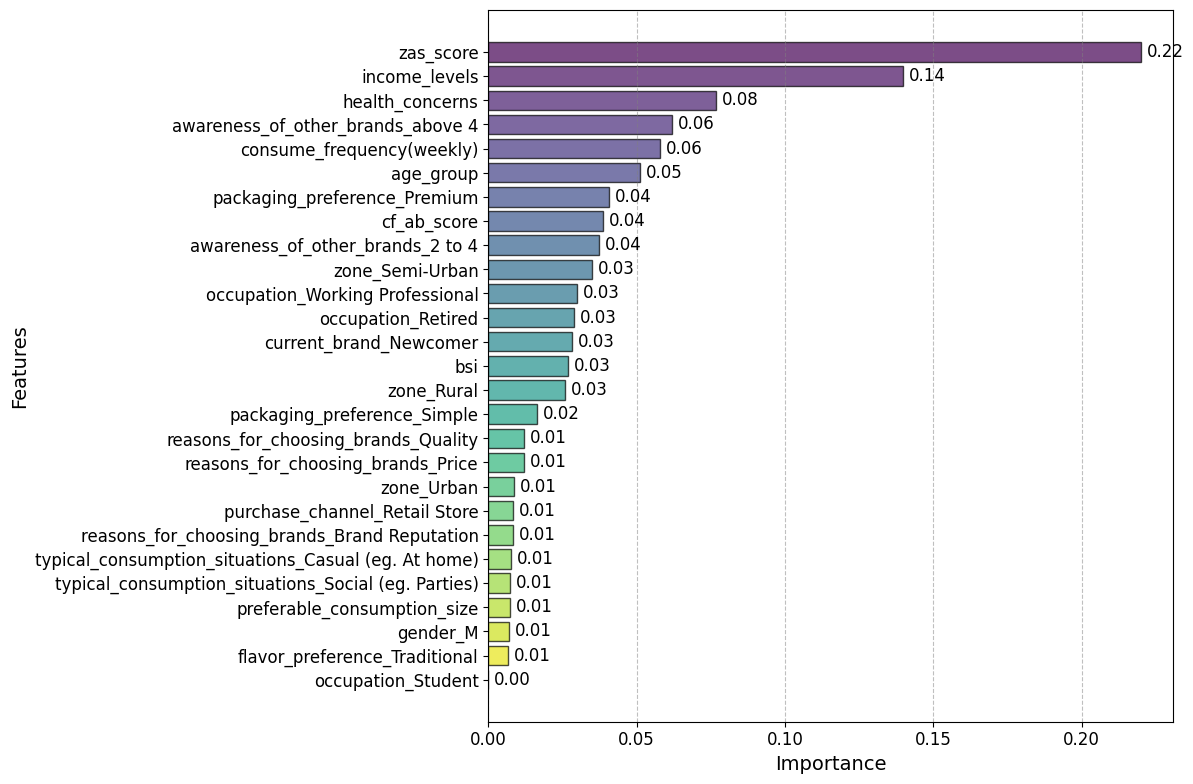

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a colormap for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance_df)))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Set transparent background for figure and plot area
fig.patch.set_alpha(1)
ax.set_facecolor('none')

bars = ax.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance'],
    color=colors,
    edgecolor='black',
    alpha=0.7  # Semi-transparent bars
)

# Customization
ax.set_xlabel('Importance', fontsize=14, color='black')
ax.set_ylabel('Features', fontsize=14, color='black')
# ax.set_title('Feature Importance', fontsize=16, color='black', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.5, color='gray')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Adding values next to bars
for bar, color in zip(bars, colors):
    ax.text(
        bar.get_width() + 0.002,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}",
        va='center',
        ha='left',
        fontsize=12,
        color='black'
    )

# Increase font size for a more professional look
plt.rcParams.update({'font.size': 12})

plt.tight_layout()

# Convert plot to PIL image for rounded corners
canvas = FigureCanvas(fig)
canvas.draw()
img = Image.frombytes('RGBA', canvas.get_width_height(), canvas.tostring_argb())
img = img.convert('RGBA')

# Define function to add rounded corners
def add_rounded_corners(image, radius=20):
    width, height = image.size
    mask = Image.new("L", (width, height), 0)
    draw = ImageDraw.Draw(mask)
    draw.rounded_rectangle((0, 0, width, height), radius=radius, fill=255)
    rounded_image = Image.new("RGBA", (width, height))
    rounded_image.paste(image, (0, 0), mask)
    return rounded_image

rounded_img = add_rounded_corners(img)

# Save the final image
rounded_img.save("feature_importance.png", format="PNG")


# Display the plot (optional)
plt.show()

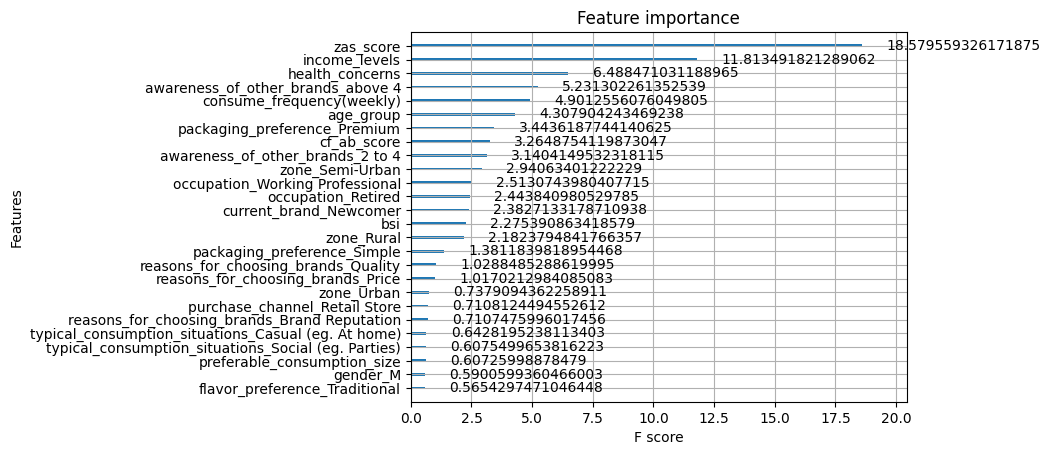

In [113]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plot_importance(xgbclassifier, importance_type='gain')  # You can also use 'weight' or 'cover'
plt.show()


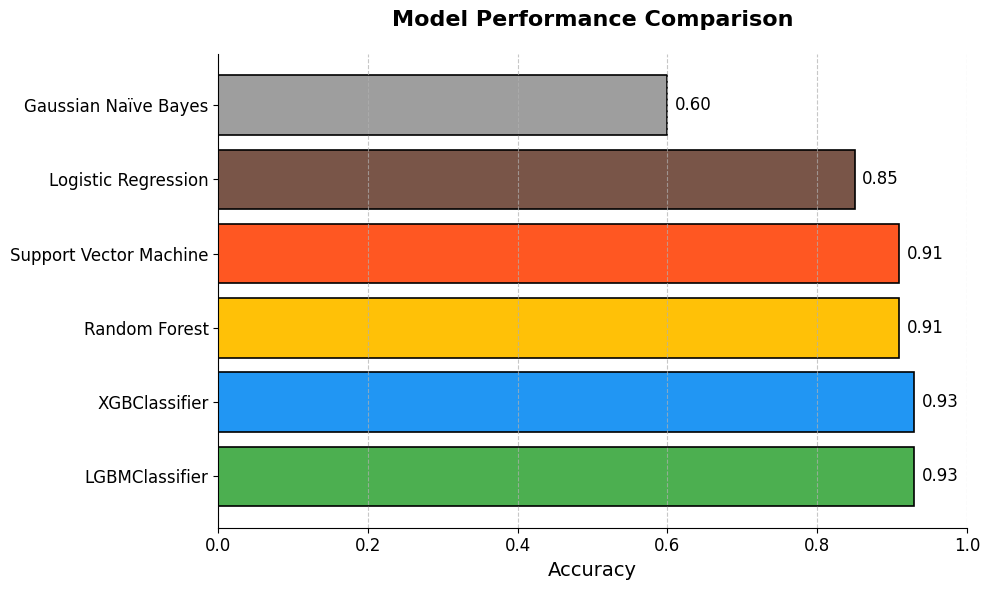

In [1]:
import matplotlib.pyplot as plt

# Data
models = [
    "LGBMClassifier", 
    "XGBClassifier", 
    "Random Forest", 
    "Support Vector Machine", 
    "Logistic Regression", 
    "Gaussian Naïve Bayes"
]
accuracies = [0.93, 0.93, 0.91, 0.91, 0.85, 0.60]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#795548', '#9E9E9E'], edgecolor='black', linewidth=1.2)

# Adding values next to bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.01, 
        bar.get_y() + bar.get_height()/2, 
        f"{bar.get_width():.2f}", 
        va='center', 
        ha='left', 
        fontsize=12, 
        color='black'
    )

# Customization
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Accuracy", fontsize=14)
plt.xlim(0, 1)  # Scale x-axis to fit accuracy range
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Adding a professional look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot as an image
plt.tight_layout()
plt.savefig("horizontal_model_performance_comparison.png", dpi=300)

# Display the plot
plt.show()


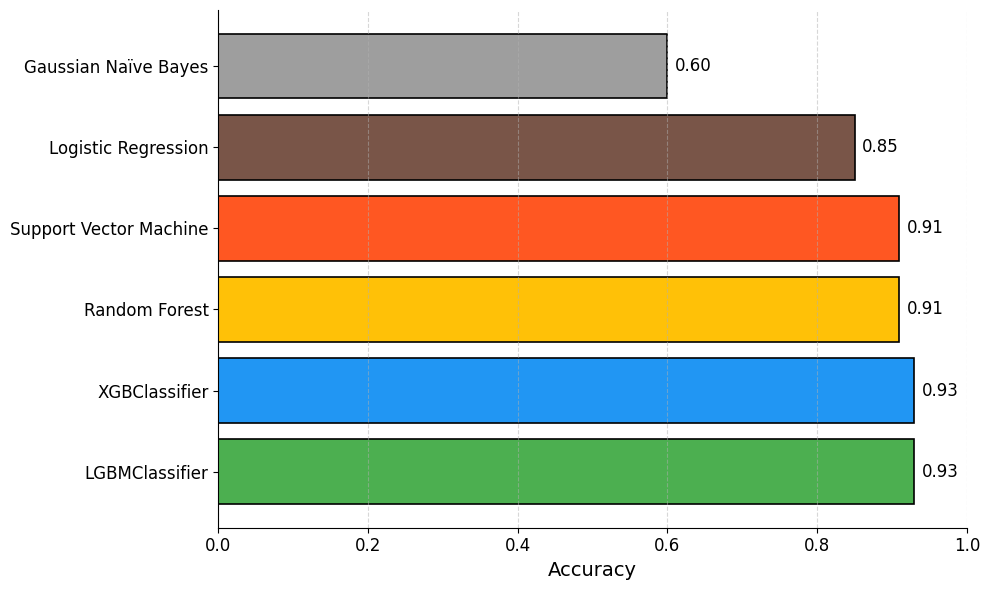

In [3]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from PIL import Image, ImageDraw

# Data
models = [
    "LGBMClassifier", 
    "XGBClassifier", 
    "Random Forest", 
    "Support Vector Machine", 
    "Logistic Regression", 
    "Gaussian Naïve Bayes"
]
accuracies = [0.93, 0.93, 0.91, 0.91, 0.85, 0.60]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#795548', '#9E9E9E'], edgecolor='black', linewidth=1.2)

# Adding values next to bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.01, 
        bar.get_y() + bar.get_height()/2, 
        f"{bar.get_width():.2f}", 
        va='center', 
        ha='left', 
        fontsize=12, 
        color='black'
    )

# Customization
# plt.title("Model Performance Comparison", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Accuracy", fontsize=14)
plt.xlim(0, 1)  # Scale x-axis to fit accuracy range
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Adding a professional look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the figure to a transparent background
plt.tight_layout()
canvas = FigureCanvas(plt.gcf())
canvas.draw()
img = Image.frombytes('RGBA', canvas.get_width_height(), canvas.tostring_argb())
img = img.convert('RGBA')  # Convert to RGBA mode for transparency

# Add rounded corners
def add_rounded_corners(image, radius=20):
    width, height = image.size
    mask = Image.new("L", (width, height), 0)
    draw = ImageDraw.Draw(mask)
    draw.rounded_rectangle((0, 0, width, height), radius=radius, fill=255)
    rounded_image = Image.new("RGBA", (width, height))
    rounded_image.paste(image, (0, 0), mask)
    return rounded_image

rounded_img = add_rounded_corners(img)

# Save the final image
rounded_img.save("rounded_model_performance_comparison.png", format="PNG")

# Display the plot
plt.show()


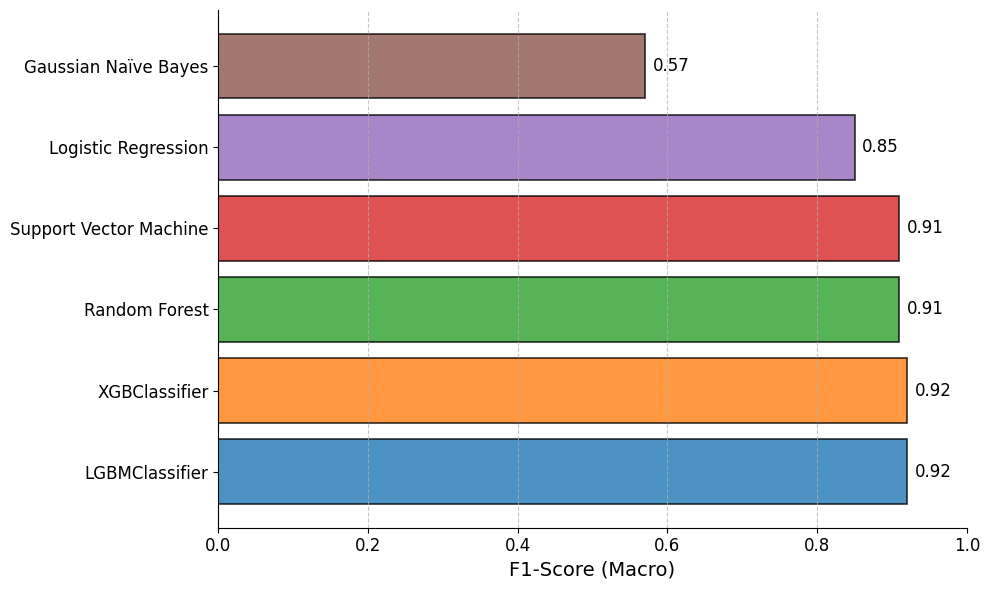

In [4]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from PIL import Image, ImageDraw

# Updated Data
models = [
    "LGBMClassifier", 
    "XGBClassifier", 
    "Random Forest", 
    "Support Vector Machine", 
    "Logistic Regression", 
    "Gaussian Naïve Bayes"
]
f1_scores = [0.92, 0.92, 0.91, 0.91, 0.85, 0.57]

# Define a new set of colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(
    models, 
    f1_scores, 
    color=colors, 
    edgecolor='black', 
    linewidth=1.2, 
    alpha=0.8  # Set transparency
)

# Adding values next to bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.01, 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}", 
        va='center', 
        ha='left', 
        fontsize=12, 
        color='black'
    )

# Customization
plt.xlabel("F1-Score (Macro)", fontsize=14)
plt.xlim(0, 1)  # Scale x-axis to fit F1-score range
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Adding a professional look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the figure to a transparent background
plt.tight_layout()
canvas = FigureCanvas(plt.gcf())
canvas.draw()
img = Image.frombytes('RGBA', canvas.get_width_height(), canvas.tostring_argb())
img = img.convert('RGBA')  # Convert to RGBA mode for transparency

# Add rounded corners
def add_rounded_corners(image, radius=20):
    width, height = image.size
    mask = Image.new("L", (width, height), 0)
    draw = ImageDraw.Draw(mask)
    draw.rounded_rectangle((0, 0, width, height), radius=radius, fill=255)
    rounded_image = Image.new("RGBA", (width, height))
    rounded_image.paste(image, (0, 0), mask)
    return rounded_image

rounded_img = add_rounded_corners(img)

# Save the final image
rounded_img.save("f1_score_comparison.png", format="PNG")

# Display the plot
plt.show()


In [117]:
oe

OrdinalEncoder(categories=[['18-25', '26-35', '36-45', '46-55', '56-70'],
                           ['Not Reported', '<10L', '10L - 15L', '16L - 25L',
                            '26L - 35L', '> 35L'],
                           ['Low (Not very concerned)',
                            'Medium (Moderately health-conscious)',
                            'High (Very health-conscious)'],
                           ['0-2 times', '3-4 times', '5-7 times'],
                           ['Small (250 ml)', 'Medium (500 ml)',
                            'Large (1 L)']],
               dtype=<class 'int'>)

In [118]:
from joblib import dump

model_data = {
    'model': xgbclassifier,
    'features': X_train.columns,
    'cols_to_oe': columns_to_encode,
    'cols_to_ohe': columns_to_ohe,
    # 'label_encoder': le,
    'one_hot_encoder': ohe,
    'ordinal_encoder': oe
}

In [119]:
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [120]:
X_train.columns

Index(['income_levels', 'consume_frequency(weekly)',
       'preferable_consumption_size', 'health_concerns', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi', 'gender_M', 'zone_Rural',
       'zone_Semi-Urban', 'zone_Urban', 'occupation_Retired',
       'occupation_Student', 'occupation_Working Professional',
       'current_brand_Newcomer', 'awareness_of_other_brands_2 to 4',
       'awareness_of_other_brands_above 4',
       'reasons_for_choosing_brands_Brand Reputation',
       'reasons_for_choosing_brands_Price',
       'reasons_for_choosing_brands_Quality', 'flavor_preference_Traditional',
       'purchase_channel_Retail Store', 'packaging_preference_Premium',
       'packaging_preference_Simple',
       'typical_consumption_situations_Casual (eg. At home)',
       'typical_consumption_situations_Social (eg. Parties)'],
      dtype='object')